<a href="https://colab.research.google.com/github/donanana/H_and_M/blob/main/H%26M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **H&M Personalized Fashion Recommendations**
---





# KAGGLE API 引入資料 (要改用TPU)

In [ ]:
# 可以增加DISK的方式(好像沒用)
# a = []
# while(1):
#     a.append('1')

In [ ]:
!rm -rf sample_data/

In [1]:
!pip install kaggle

In [2]:
!mkdir .kaggle

要去kaggle/account看

In [3]:
import json
token = {"username":"donanana","key":"e49e8b214f2601b5cfaa90071105470e"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)

In [4]:
!chmod 600 /content/.kaggle/kaggle.json

In [9]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [10]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [11]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations -p /content

100% 28.7G/28.7G [03:07<00:00, 204MB/s]
100% 28.7G/28.7G [03:07<00:00, 164MB/s]


In [ ]:
!unzip \*.zip && rm*.zip

In [15]:
import pandas as pd
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transactions_train = pd.read_csv('transactions_train.csv')
images_dir = 'images'

kaggle-image CNN 範例:
https://www.kaggle.com/code/hamditarek/similar-image-cnn-cosine-similarity

# 上傳電腦上的檔案

In [13]:
!rm -rf sample_data/

In [ ]:
from google.colab import files
uploaded = files.upload()

# GOOGLE DRIVE 引入資料

In [ ]:
# import pandas as pd
# from google.colab import drive
# drive.mount( '/content/gdrive' )
# articles = pd.read_csv('/content/gdrive/MyDrive/Deep Learning/h-and-m-personalized-fashion-recommendations/articles.csv')
# customers = pd.read_csv('/content/gdrive/MyDrive/Deep Learning/h-and-m-personalized-fashion-recommendations/customers.csv')
# transactions_train = pd.read_csv('/content/gdrive/MyDrive/Deep Learning/h-and-m-personalized-fashion-recommendations/transactions_train.csv')
# new_article_list = pd.read_csv('/content/gdrive/MyDrive/Deep Learning/h-and-m-personalized-fashion-recommendations/new_article_list.csv')

Mounted at /content/gdrive


# 進度條

In [ ]:
import time
n = 100
icon = '⋮⋰⋯⋱'          # 建立旋轉的符號清單
for i in range(n+1):
  print(f'\r{icon[i%4]} {i*100/n}%', end='')
  time.sleep(0.1)

# Articles dataset 分析

In [ ]:
print("shape of data Articles data",articles.shape)

shape of data Articles data (105542, 25)


單項與關聯項目個數統計

index_group_name / index_group_no

In [ ]:
pd.DataFrame(articles.groupby(['index_group_no','index_group_name']).size().reset_index(name='counts'))

,index_group_no,index_group_name,counts
0,1,Ladieswear,39737
1,2,Divided,15149
2,3,Menswear,12553
3,4,Baby/Children,34711
4,26,Sport,3392


index_name / index_code

In [ ]:
pd.DataFrame(articles.groupby(['index_code','index_name']).size().reset_index(name='counts'))

,index_code,index_name,counts
0,A,Ladieswear,26001
1,B,Lingeries/Tights,6775
2,C,Ladies Accessories,6961
3,D,Divided,15149
4,F,Menswear,12553
5,G,Baby Sizes 50-98,8875
6,H,Children Sizes 92-140,12007
7,I,Children Sizes 134-170,9214
8,J,"Children Accessories, Swimwear",4615
9,S,Sport,3392


index_group_name&index_name

In [ ]:
articles.groupby(['index_group_name', 'index_name']).size()

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
dtype: int64

articles_divided

In [ ]:
articles_divided = articles[articles['index_name']=='Divided']
articles_divided[['article_id','prod_name','product_type_name','detail_desc','index_name','section_name','garment_group_name']].drop_duplicates().head(12)

,article_id,prod_name,product_type_name,detail_desc,index_name,section_name,garment_group_name
78,162074062,Sigge sneaker sock 5p,Socks,Fine-knit trainer socks in various colours.,Divided,Divided Basics,"Under-, Nightwear"
79,162074069,Sigge sneaker sock 5p,Socks,Fine-knit trainer socks in various colours.,Divided,Divided Basics,"Under-, Nightwear"
80,162074071,Sigge sneaker sock 5p,Socks,Fine-knit trainer socks in various colours.,Divided,Divided Basics,"Under-, Nightwear"
124,181160009,Eva chelsea boot,Boots,Chelsea boots with elasticated gores in the si...,Divided,Divided Accessories,Shoes
125,181448022,Jenny 5-pack,Socks,Fine-knit socks.,Divided,Divided Basics,"Under-, Nightwear"
126,181448102,Jenny 5-pack,Socks,Fine-knit socks.,Divided,Divided Basics,"Under-, Nightwear"
127,181448103,Jenny 5-pack,Socks,Fine-knit socks.,Divided,Divided Basics,"Under-, Nightwear"
128,181448104,Jenny 5-pack,Socks,Fine-knit socks.,Divided,Divided Basics,"Under-, Nightwear"
129,181448105,Jenny 5-pack,Socks,Fine-knit socks.,Divided,Divided Basics,"Under-, Nightwear"
130,181448106,Jenny 5-pack,Socks,Fine-knit socks.,Divided,Divided Basics,"Under-, Nightwear"


product_group_name

In [ ]:
pd.DataFrame(articles.groupby('product_group_name').size().reset_index(name='counts'))

,product_group_name,counts
0,Accessories,11158
1,Bags,25
2,Cosmetic,49
3,Fun,2
4,Furniture,13
5,Garment Full body,13292
6,Garment Lower body,19812
7,Garment Upper body,42741
8,Garment and Shoe care,9
9,Interior textile,3


product_name

In [ ]:
pd.DataFrame(articles.groupby('product_type_name').size().reset_index(name='counts'))

,product_type_name,counts
0,Accessories set,7
1,Alice band,6
2,Baby Bib,3
3,Backpack,6
4,Bag,1280
...,...,...
126,Wedge,113
127,Weekend/Gym bag,9
128,Wireless earphone case,2
129,Wood balls,1


In [ ]:
for group in articles['product_group_name'].unique():
    print('Number of subcategories in "{}"" is {}.'.format(group, len(articles.groupby(['product_group_name', 'product_type_name']).size()[group])))

Number of subcategories in "Garment Upper body"" is 15.
Number of subcategories in "Underwear"" is 11.
Number of subcategories in "Socks & Tights"" is 3.
Number of subcategories in "Garment Lower body"" is 5.
Number of subcategories in "Accessories"" is 38.
Number of subcategories in "Items"" is 5.
Number of subcategories in "Nightwear"" is 4.
Number of subcategories in "Unknown"" is 1.
Number of subcategories in "Underwear/nightwear"" is 2.
Number of subcategories in "Shoes"" is 16.
Number of subcategories in "Swimwear"" is 6.
Number of subcategories in "Garment Full body"" is 6.
Number of subcategories in "Cosmetic"" is 2.
Number of subcategories in "Interior textile"" is 3.
Number of subcategories in "Bags"" is 6.
Number of subcategories in "Furniture"" is 1.
Number of subcategories in "Garment and Shoe care"" is 6.
Number of subcategories in "Fun"" is 1.
Number of subcategories in "Stationery"" is 1.


colour_group_name


In [ ]:
pd.DataFrame(articles.groupby('colour_group_name').size().reset_index(name='counts'))

,colour_group_name,counts
0,Beige,2712
1,Black,22670
2,Blue,3308
3,Bronze/Copper,94
4,Dark Beige,1084
5,Dark Blue,12171
6,Dark Green,2106
7,Dark Grey,2731
8,Dark Orange,886
9,Dark Pink,818


perceived_colour_value_name


In [ ]:
pd.DataFrame(articles.groupby('perceived_colour_value_name').size().reset_index(name='counts'))

,perceived_colour_value_name,counts
0,Bright,6471
1,Dark,42706
2,Dusty Light,22152
3,Light,15739
4,Medium,5711
5,Medium Dusty,12630
6,Undefined,105
7,Unknown,28


perceived_colour_master_name


In [ ]:
pd.DataFrame(articles.groupby('perceived_colour_master_name').size().reset_index(name='counts'))

,perceived_colour_master_name,counts
0,Beige,5657
1,Black,22585
2,Blue,18469
3,Bluish Green,3
4,Brown,2269
5,Green,3526
6,Grey,8924
7,Khaki green,3181
8,Lilac Purple,1100
9,Metal,2180


graphical_appearance_name

In [ ]:
pd.DataFrame(articles.groupby('graphical_appearance_name').size().reset_index(name='counts'))

,graphical_appearance_name,counts
0,All over pattern,17165
1,Application/3D,1341
2,Argyle,15
3,Chambray,322
4,Check,2178
5,Colour blocking,1830
6,Contrast,376
7,Denim,4842
8,Dot,681
9,Embroidery,1165


detail_desc

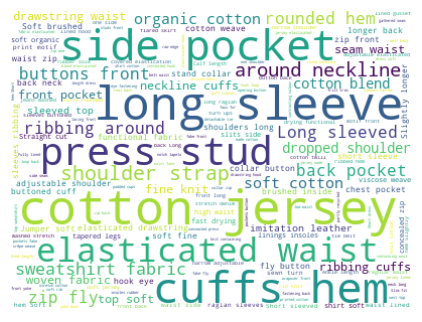

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS # library to create a wordcloud
from PIL import Image
from matplotlib import pyplot as plt

# creating cloud of words
words_raw = articles['detail_desc'].dropna().apply(nltk.word_tokenize)
bag_of_words = " ".join(words_raw.explode())
stopwords = set(STOPWORDS)

# creating cloud of words
fig, ax1 = plt.subplots(dpi=100)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", height=300, contour_width=3).generate(bag_of_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Customer dataset 分析

In [ ]:
print("shape of data Customer data",customers.shape)

shape of data Customer data (1371980, 7)


統計FN與Active數量

In [ ]:
customers_backup = customers.copy()
customers[['FN','Active']] = customers[['FN','Active']].fillna(0)
customers['club_member_status'] = customers['club_member_status'].fillna('N/A')
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].fillna('N/A')

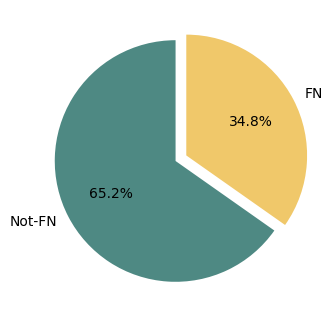

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot

fig, ax = plt.subplots(dpi=100)
explode = (0, 0.1)
ppt = ["#4e8983", "#f0c86a", "#dc4412"]
colors = sns.color_palette(ppt)
ax.pie(customers['FN'].value_counts(), explode=explode, labels=['Not-FN','FN'],
       autopct='%1.1f%%',shadow=False, startangle=90, colors=colors)

plt.show()

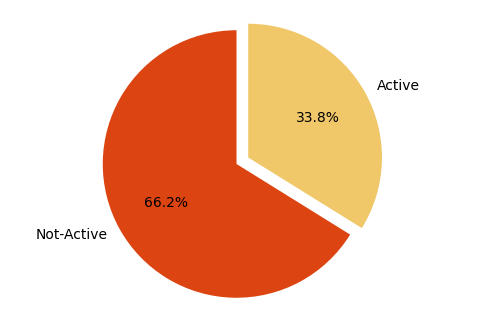

In [ ]:
fig, ax = plt.subplots(dpi=100)
explode = (0, 0.1)
ppt = ["#dc4412" , "#f0c86a" , "#4e8983"]
colors = sns.color_palette(ppt)
ax.pie(customers['Active'].value_counts(), explode=explode, labels=['Not-Active','Active'],
       autopct='%1.1f%%',shadow=False, startangle=90, colors=colors)
ax.axis('equal')
plt.show()

In [ ]:
FN_Active = len(customers[(customers['FN']==1) & (customers['Active']==1)])/customers.shape[0]*100
print('Percentage of customers that have both FN and Active status: {}%'.format(round(FN_Active,1)))
FN_not_active = len(customers[(customers['FN']==1) & (customers['Active']!=1)])/customers.shape[0]*100
print('Percentage of customers that have FN status but are not Active: {}%'.format(round(FN_not_active,1)))
Active_not_FN = len(customers[(customers['FN']!=1) & (customers['Active']==1)])/customers.shape[0]*100
print('Percentage of customers that do not have FN status but Active: {}%'.format(round(Active_not_FN,1)))
Active_not_FN = len(customers[(customers['FN']!=1) & (customers['Active']!=1)])/customers.shape[0]*100
print('Percentage of customers that do not have FN status but Active: {}%'.format(round(Active_not_FN,1)))

Percentage of customers that have both FN and Active status: 33.8%
Percentage of customers that have FN status but are not Active: 0.9%
Percentage of customers that do not have FN status but Active: 0.0%
Percentage of customers that do not have FN status but Active: 65.2%


In [ ]:
pd.DataFrame(customers.groupby(['club_member_status']).size().reset_index(name='counts'))

,club_member_status,counts
0,ACTIVE,1272491
1,LEFT CLUB,467
2,N/A,6062
3,PRE-CREATE,92960


In [ ]:
pd.DataFrame(customers.groupby(['fashion_news_frequency']).size().reset_index(name='counts'))

,fashion_news_frequency,counts
0,Monthly,842
1,N/A,16009
2,NONE,877711
3,None,2
4,Regularly,477416


In [ ]:
pd.DataFrame(customers.groupby(['age']).size().reset_index(name='counts'))

,age,counts
0,16.0,161
1,17.0,9392
2,18.0,24323
3,19.0,37707
4,20.0,55196
...,...,...
79,95.0,10
80,96.0,3
81,97.0,4
82,98.0,7


# transactions_train dataset 分析

In [ ]:
print("shape of data Customer data",transactions_train.shape)

shape of data Customer data (31788324, 5)


In [ ]:
transactions_train

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


sales_channel_id

In [ ]:
pd.DataFrame(transactions_train.groupby(['sales_channel_id']).size().reset_index(name='counts'))

,sales_channel_id,counts
0,1,9408462
1,2,22379862


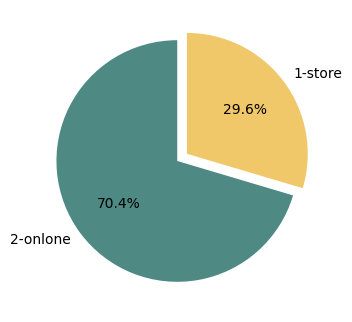

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot

fig, ax = plt.subplots(dpi=100)
explode = (0, 0.1)
ppt = ["#4e8983", "#f0c86a", "#dc4412"]
colors = sns.color_palette(ppt)
ax.pie(transactions_train['sales_channel_id'].value_counts(), explode=explode, labels=['2-onlone','1-store'],
       autopct='%1.1f%%',shadow=False, startangle=90, colors=colors)

plt.show()

# Combine data

In [ ]:
transactions_train['year_month'] = transactions_train['t_dat'].dt.to_period('M')
transactions_train

,t_dat,customer_id,article_id,price,sales_channel_id,year_month
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09
...,...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,2020-09
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,2020-09
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,2020-09
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,2020-09


# new_article_list

In [16]:
transactions_train.article_id
print("The size of an array is: ", len(transactions_train.article_id))

The size of an array is:  31788324


In [17]:
import numpy
article_id_unique = numpy.unique(transactions_train.article_id).tolist()
print("The size of an array is: ", len(article_id_unique))

The size of an array is:  104547


In [18]:
article_id_with_counts = pd.DataFrame(transactions_train.groupby(['article_id']).size().reset_index(name='counts'))
article_id_with_counts

,article_id,counts
0,108775015,10841
1,108775044,7250
2,108775051,215
3,110065001,1044
4,110065002,539
...,...,...
104542,952267001,41
104543,952938001,9
104544,953450001,17
104545,953763001,35


In [19]:
pd.DataFrame(article_id_with_counts.groupby(['counts']).size().reset_index(name='counts_2'))

,counts,counts_2
0,1,4491
1,2,3197
2,3,2634
3,4,2350
4,5,1997
...,...,...
3745,26329,1
3746,30199,1
3747,31718,1
3748,35043,1


In [20]:
left = article_id_with_counts
for i in range(len(left)):
  if(left.at[i, 'counts']<=100):
    left = left.drop(i, axis=0)
    i -= 1
len(left)

44466

# price處理

In [24]:
transactions_train

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [ ]:
transactions_train.sort_values(['article_id','price'],ascending=[1,0],inplace=True)
group_max_price = transactions_train.groupby(['article_id']).head(1)
group_max_price

,t_dat,customer_id,article_id,price,sales_channel_id
5120460,2019-01-18,0de87cef766d2f94a8b33d34004b3f9cbd29bf48ba1f54...,108775015,0.009153,2
8072223,2019-03-31,1e1fbdd4bc24bf8bea35b8cbc592c2b2a3d401e2730754...,108775044,0.008508,2
1225406,2018-10-16,223b57f8a311cd676f0d6a3e4f83710b910cfd86c7e466...,108775051,0.008458,2
31284,2018-09-20,a386a8919a8b7391dfebe77b7b272f3039391efe172ceb...,110065001,0.025407,2
9448,2018-09-20,334b9b10d01a6b65890e8572f5244c1c9c02a044b5fc91...,110065002,0.025407,1
...,...,...,...,...,...
30995606,2020-09-01,25a117b344c75311e154af5b6e5a45a171bb34c50bbc10...,952267001,0.016932,1
31539435,2020-09-15,aa5b230a1e34a3e82dd9b5c829dd92276071163de6b2cb...,952938001,0.050831,2
31228916,2020-09-07,463fa5048cfebfb99d37526ab5eeaa816c6ff72000f39a...,953450001,0.016932,2
31452352,2020-09-12,ff1a96cdb09f91f4c862f4706d3313a9b569fc3122f33e...,953763001,0.022017,2
